In [27]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D 
from keras.utils import to_categorical
from keras.datasets import cifar10

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

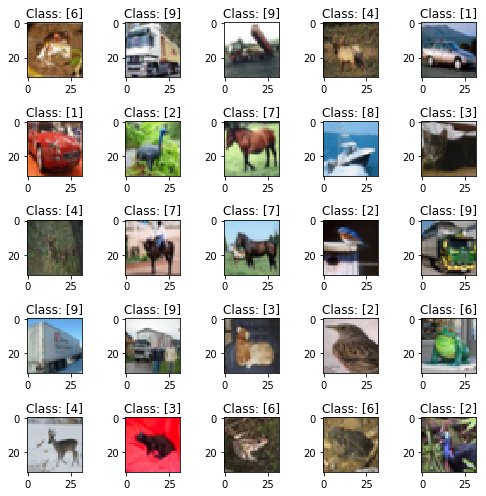

In [20]:
fig = plt.figure(figsize=(7,7))
for idx in range(25):
    plt.subplot(5,5, idx+1)
    plt.imshow(X_train[idx], interpolation='none') #cmap='gray'
    plt.title('Class: {}'.format(y_train[idx]))
plt.tight_layout()

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
if np.max(X_train) > 1: X_train = X_train/255
if np.max(X_test) > 1: X_test = X_test/255

In [22]:
if len(y_train.shape)==2:
    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)
if len(y_train.shape)==1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

In [32]:
X_train.shape, y_train.shape, num_classes

((50000, 32, 32, 3), (50000, 10), 10)

In [37]:
input = (32, 32, 3)

In [38]:
model = Sequential( [
    Conv2D(filters=32, kernel_size=(3,3), input_shape=input),
    Conv2D(filters=32, kernel_size=(3,3), input_shape=input),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters=64, kernel_size=(3,3), input_shape=input),
    Conv2D(filters=64, kernel_size=(3,3), input_shape=input),

    MaxPool2D(pool_size=(2,2)),
    
    Flatten(),    
    Dense(1024, activation='relu'),
    Dropout(0.5)
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=3,
    validation_data=(X_test, y_test) )

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 118s 2ms/step - loss: 1.3758 - acc: 0.5132 - val_loss: 1.0774 - val_acc: 0.6228
Epoch 2/3
50000/50000 [==============================] - 109s 2ms/step - loss: 0.9685 - acc: 0.6635 - val_loss: 0.9852 - val_acc: 0.6572
Epoch 3/3
50000/50000 [==============================] - 116s 2ms/step - loss: 0.7597 - acc: 0.7388 - val_loss: 0.8841 - val_acc: 0.6991


In [40]:
score = model.evaluate(X_test, y_test, verbose=0)

In [41]:
score

[0.8840735046386718, 0.6991]

In [42]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 10s 1ms/step


[0.8840735046386718, 0.6991]